In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset into tool

In [3]:
data = pd.read_csv('/content/winequality-red.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Data preprocessing including Vizualization

In [4]:
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [5]:
#check for missing values
print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [6]:
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [ ]:
#vizualize the distribution of the wine quality

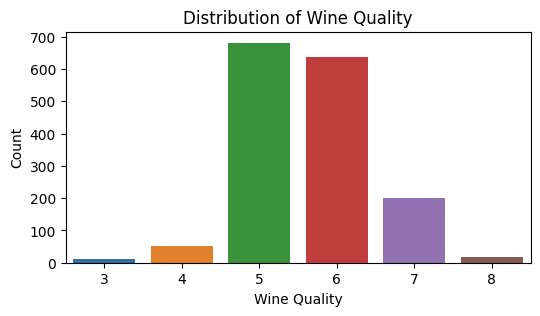

In [9]:
plt.figure(figsize=(6,3))
sns.countplot(x='quality',data=data)
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality')
plt.show()

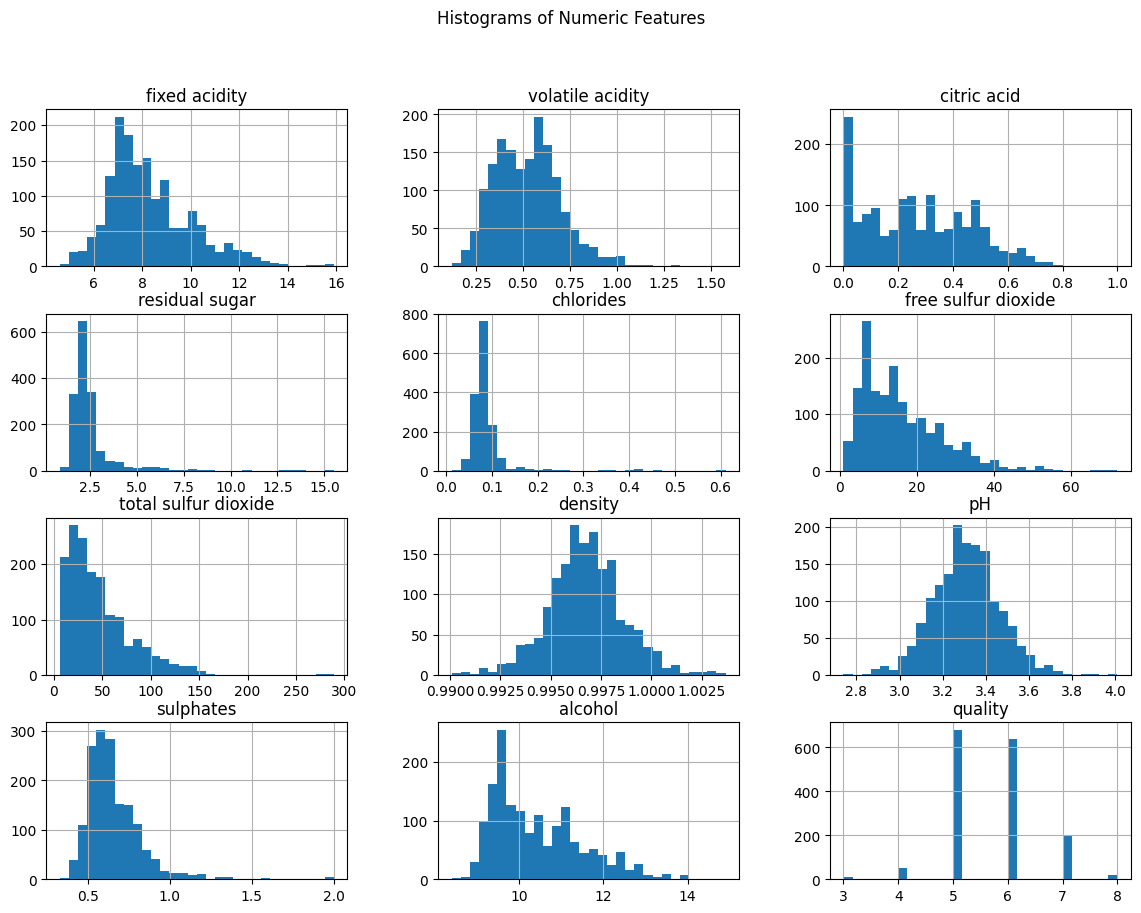

In [10]:
#Visualize the distribution of numerical features
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.hist(bins=30,figsize=(14,10))
plt.suptitle('Histograms of Numeric Features')
plt.show()

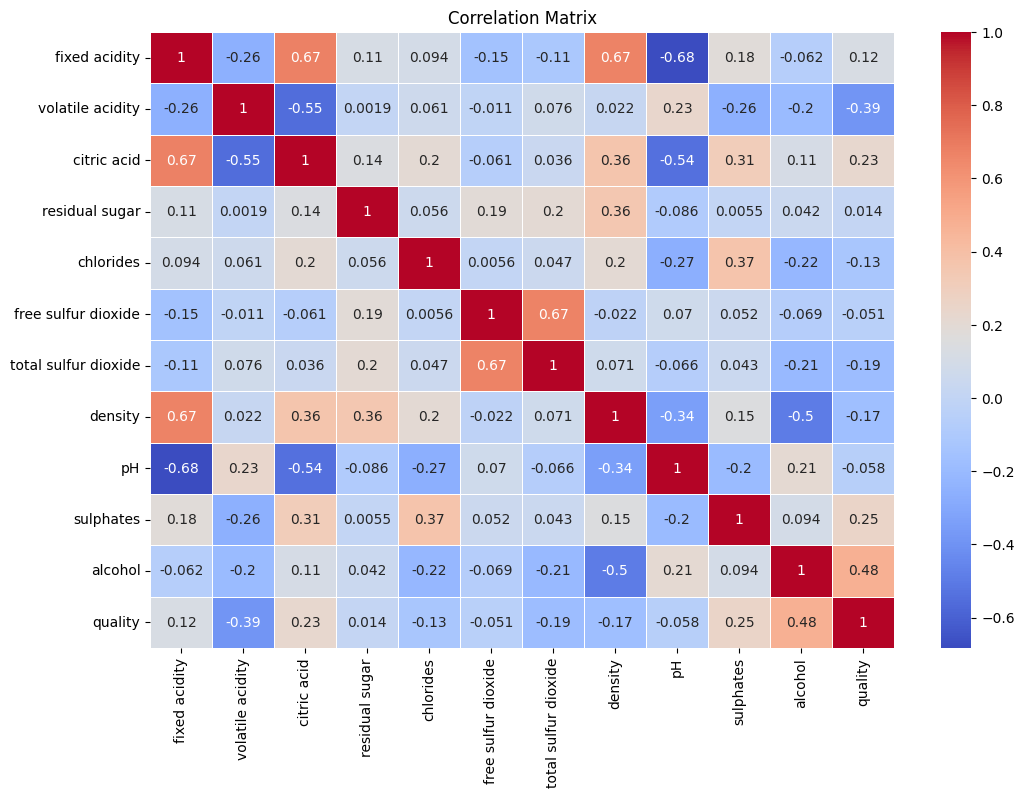

In [11]:
#Visualize the correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',linewidths=0.6)
plt.title('Correlation Matrix')
plt.show()

In [15]:
#features(X) and the target Variable(y)
X = data.drop('quality',axis=1)
y = data['quality']
X
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

Machine learning model building

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [17]:
#split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=40)


In [18]:
#Standardize the features
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
#Model Building (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100,random_state=40)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=40)

Evaluate the model

In [22]:
#Evaluate the model
y_pred = model.predict(X_test)

In [23]:
#calculate Mean Squared Error
mse = mean_squared_error(y_test,y_pred)

print(f"Mean Squared Error: {mse: .2f}")



Mean Squared Error:  0.33


In [26]:
#calculate Mean Absolute error
mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error: {mae: .2f}")

Mean Absolute Error:  0.42


In [28]:
#calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse: .2f}")

Root Mean Squared Error:  0.58


In [29]:
#calculate R-squared
r2 = r2_score(y_test,y_pred)
print(f"R-squared: {r2: .2f}")

R-squared:  0.53


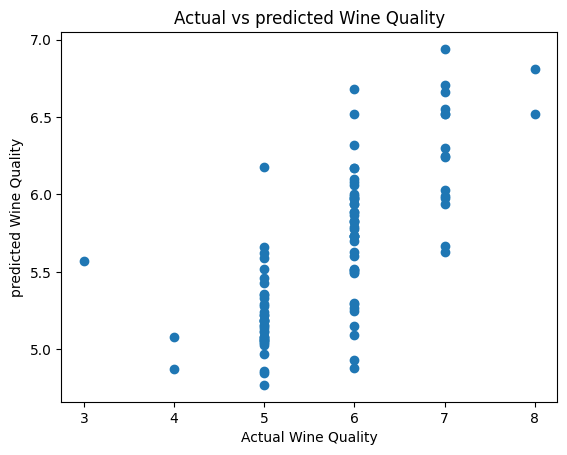

In [30]:
#Visualize predicted vs actual values
plt.scatter(y_test[:100],y_pred[:100])
plt.xlabel("Actual Wine Quality")
plt.ylabel("predicted Wine Quality")
plt.title("Actual vs predicted Wine Quality")
plt.show()